# Function and class definitions:

## import Libraries and define parameters

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import FS3
import Plot_definitions as pld
import Collected_runs as cr

mpl.rcParams.update(
    {
        "text.usetex": False,
        "font.family": "serif",
        "font.serif": "cmr10",
        "mathtext.fontset": "cm",
        "font.family": "STIXGeneral",
        "axes.unicode_minus": True,
        "axes.labelsize": 21,
        "xtick.labelsize": 18,
        "ytick.labelsize": 18,
        "legend.fontsize": 16,
        "xtick.direction": "in",
        "ytick.direction": "in",
        "xtick.major.top": "on",
        "xtick.major.bottom": "on",
        "ytick.major.left": "on",
        "ytick.major.right": "on",
        "xtick.top": True,
        "ytick.right": True,
    }
)

plt.close('all')

# $\nu$:
## Binder Cumulant: $U_2(\tau,L)=f_{U_2}(\tau L^{1/\nu}) \cdot (1 + c L^{-\omega})$

chi2/d.o.f = 3.84          
gc = 5.79631(4)
nu = 0.7188(9)
c = 2.21(2)
omega = 0.548(3)
a0 = 0.1684(6)
a1 = -0.0544(2)
a2 = 0.0147(3)
a3 = 0.00082(4)



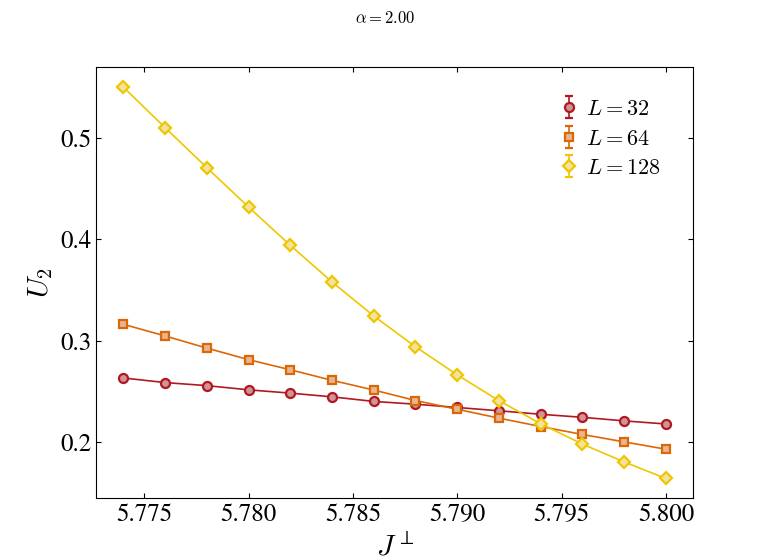

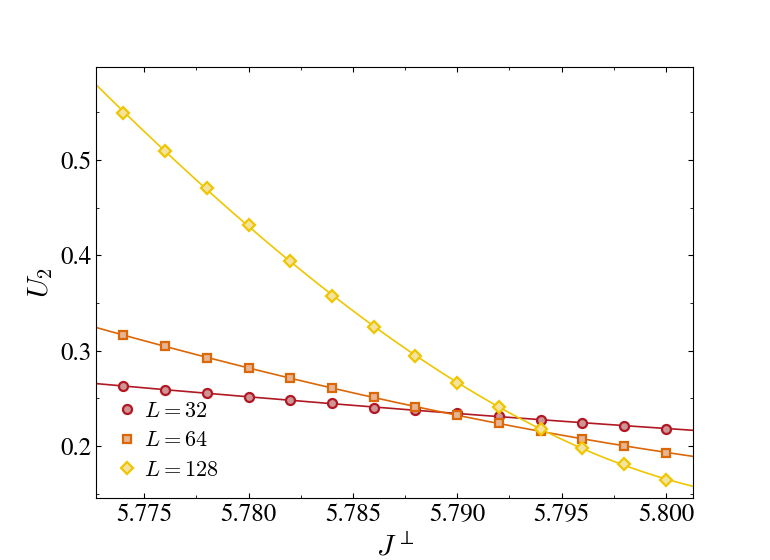

In [9]:
plt.close("all")
path = [f"/home/daniel/Master_thesis/Data/Leo4DataJ/runs_Js000"]

cl_runs = cr.collected_runs(path, True, cutoff=100)

cl_runs.select(LRange=[32], gRange=[0.0])

data,_,_ = cl_runs.get_x_vs_y_data(
    xname="g_param",
    yname="binder",
    xfunc="x",
    yfunc="y",
    plot=True,
    xscale="linear",
    yscale="linear",
    xlabel="",
    ylabel="",
)

fitFunc = cr.fitfunc(
    fstring="f((x/gc - 1)*L**(1/nu))*(1 + c*L**(-omega))",
    vars=["gc", "nu", "c", "omega"],
    polyOrder=3,
)

fit_res = cr.data_fit(data, fitFunc, start_params=[5.8, 0.75], fitSummary=True)
params, dparams, redChi2, mesg, ierr = fit_res
var = fitFunc.unpack(params)
dvar = fitFunc.unpack(dparams)

fig = cr.fit_plot(data, fitFunc, fit_res, xlabel=r"$J^{\perp}$", ylabel=r"$U_2$")

# Inset

# fig, ax1 = FS3.addInset(fig, loc=3)
# ax1.set_xlabel(r"$(J^{\perp}-J^{\perp}_c)\, L^{1/\nu}$")
# ax1.set_ylabel(r"$U_2/(1+cL^{-\omega})$")

# dataCollapse, fig, ax2 = cl_runs.get_x_vs_y_data(
#     xname="g_param",
#     yname="spin_stiffness",
#     xfunc="(x/gc-1)*L**(1./nu)",
#     yfunc="y/(1 + c*L**(-omega))",
#     arg={
#         "nu": var["nu"],
#         "gc": var["gc"],
#         "omega": var["omega"],
#         "c": var["c"],
#         # "dnu": dvar["nu"], "dgc": dvar["gc"], "domega": dvar["omega"], "dc": dvar["c"]
#     },
#     plot=True,
#     xscale="linear",
#     yscale="linear",
#     xlabel="",
#     ylabel="",
# )

# dataCollapse = FS3.rescaleAxis(
#     data,
#     xfunc="(x-gc)*L**(1./nu)",
#     yfunc="y/(1 + c*L**(-omega/nu))",
#     arg={"nu": var["nu"], "gc": var["gc"], "omega": var["omega"], "c": var["c"]},
# )
# for L in np.sort(list(data), axis=0):
#     ax1.errorbar(
#         dataCollapse[L][:, 0],
#         dataCollapse[L][:, 1],
#         yerr=dataCollapse[L][:, 2],
#         **FS3.errorbarStyle(L),
#         linestyle="",
#     )
# ax1.axhline(var["a"][0], color="#dddddd")
# ax1.axvline(0, color="#dddddd")

## Spin stiffness: $\rho_s(\tau,L) = L^{-z}(f_{\rho_s}(\tau L^{1/\nu})\cdot (1 + c L^{-\omega}))$

chi2/d.o.f = 36.37         
gc = 3.18295(2)
nu = 0.7387(7)
c = -0.817(4)
omega = 0.039(1)
z = 1.034(3)
a0 = 4.54(5)
a1 = -2.16(4)
a2 = 0.313(7)
a3 = -0.0007(4)



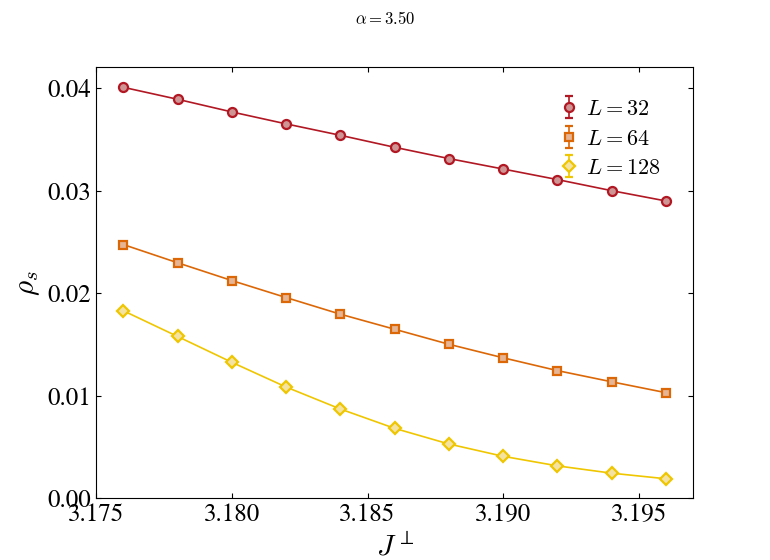

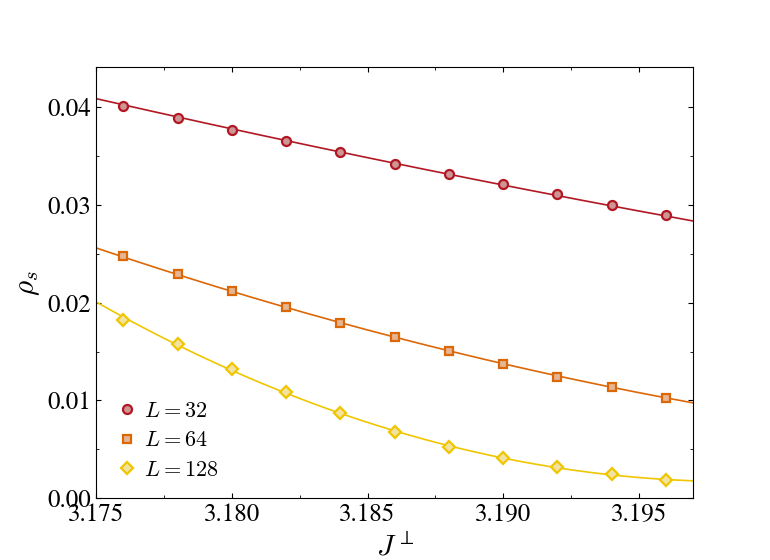

In [ ]:
plt.close("all")
path = [f"/home/daniel/Master_thesis/Data/Leo4DataJ/runs_Js000"]

cl_runs = cr.collected_runs(path, True, cutoff=100)

cl_runs.select(LRange=[32], gRange=[0.0])

data,_,_ = cl_runs.get_x_vs_y_data(
    xname="g_param",
    yname="spin_stiffness",
    xfunc="x",
    yfunc="y",
    plot=True,
    xscale="linear",
    yscale="linear",
    xlabel="",
    ylabel="",
)

fitFunc = cr.fitfunc(
    fstring="f((x/gc - 1)*L**(1/nu))*(1 + c*L**(-omega))*L**(-z)",
    vars=["gc", "nu", "c", "omega","z"],
    polyOrder=3,
)

fit_res = cr.data_fit(data, fitFunc, start_params=[5.8, 0.75], fitSummary=True)
params, dparams, redChi2, mesg, ierr = fit_res
var = fitFunc.unpack(params)
dvar = fitFunc.unpack(dparams)

fig = cr.fit_plot(data, fitFunc, fit_res, xlabel=r"$J^{\perp}$", ylabel=r"$\rho_s$")

# Inset

# fig, ax1 = FS3.addInset(fig, loc=3)
# ax1.set_xlabel(r"$(J^{\perp}-J^{\perp}_c)\, L^{1/\nu}$")
# ax1.set_ylabel(r"$U_2/(1+cL^{-\omega})$")

# dataCollapse, fig, ax2 = cl_runs.get_x_vs_y_data(
#     xname="g_param",
#     yname="spin_stiffness",
#     xfunc="(x/gc-1)*L**(1./nu)",
#     yfunc="y/(1 + c*L**(-omega))",
#     arg={
#         "nu": var["nu"],
#         "gc": var["gc"],
#         "omega": var["omega"],
#         "c": var["c"],
#         # "dnu": dvar["nu"], "dgc": dvar["gc"], "domega": dvar["omega"], "dc": dvar["c"]
#     },
#     plot=True,
#     xscale="linear",
#     yscale="linear",
#     xlabel="",
#     ylabel="",
# )

# dataCollapse = FS3.rescaleAxis(
#     data,
#     xfunc="(x-gc)*L**(1./nu)",
#     yfunc="y/(1 + c*L**(-omega/nu))",
#     arg={"nu": var["nu"], "gc": var["gc"], "omega": var["omega"], "c": var["c"]},
# )
# for L in np.sort(list(data), axis=0):
#     ax1.errorbar(
#         dataCollapse[L][:, 0],
#         dataCollapse[L][:, 1],
#         yerr=dataCollapse[L][:, 2],
#         **FS3.errorbarStyle(L),
#         linestyle="",
#     )
# ax1.axhline(var["a"][0], color="#dddddd")
# ax1.axvline(0, color="#dddddd")


# Check if @ T= 0:

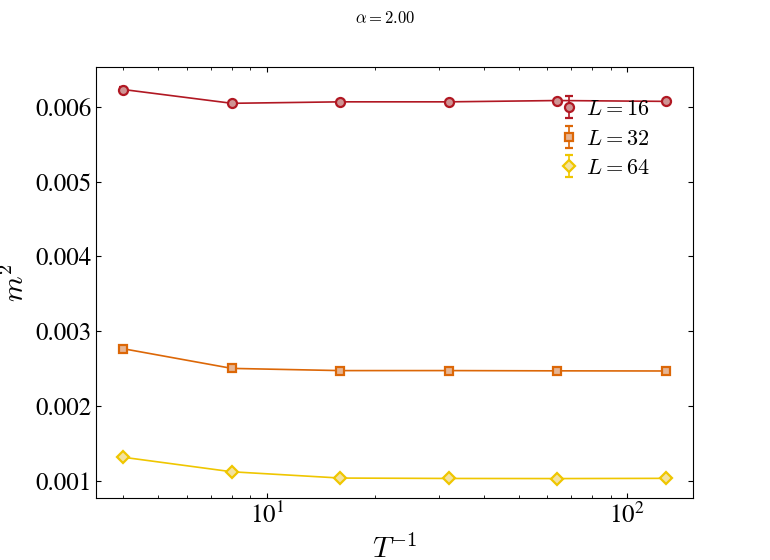

In [9]:
plt.close('all')

path = [f"/home/daniel/Master_thesis/Data/runs_BETAJ5"]

cl_runs = cr.collected_runs(path, False, cutoff=3)

data = cl_runs.get_x_vs_y_data(
    xname="g_param",
    yname="mag2",
    xfunc="1/x",
    yfunc="y/(Ns**2)",
    plot=True,
    xscale="log",
    yscale="linear",
    xlabel=r"$^{-1}$"
)

# $\chi$

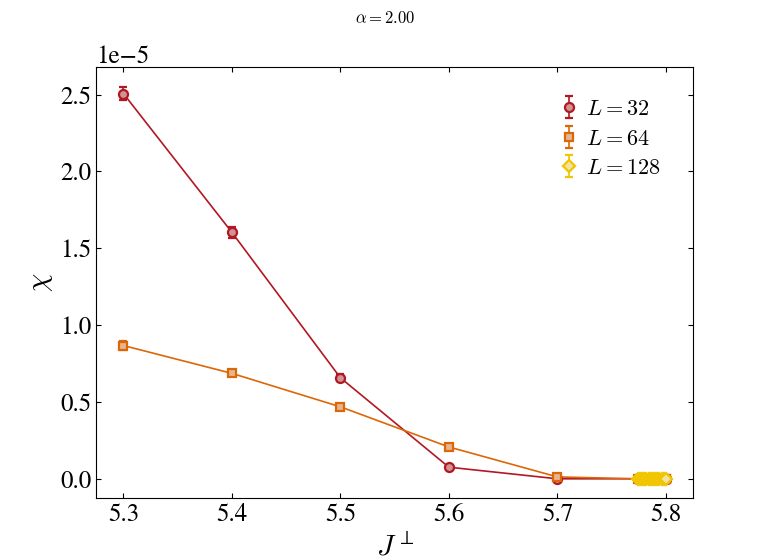

In [16]:
plt.close('all')

path = [f"/home/daniel/Master_thesis/Data/Leo4DataJ/runs_Js000",
        "/home/daniel/Master_thesis/Data/runs_CHI"]

cl_runs = cr.collected_runs(path, True, cutoff=10)

data = cl_runs.get_x_vs_y_data(
    xname="g_param",
    yname="susceptibility",
    xfunc="x",
    yfunc="y/(L**4)",
    plot=True,
    xscale="linear",
    yscale="linear",
    xlabel="",
    ylabel="",
)

# Check $\chi$

Get Data

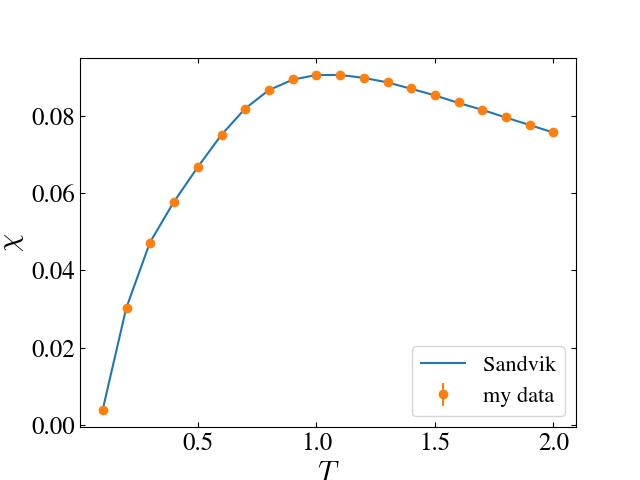

In [13]:
plt.close('all')

sandvik_fig64 = pd.read_csv("/home/daniel/Master_thesis/Data/sandvik_fig64.csv",header=0, sep=",")

sandvik_x = sandvik_fig64["x"]
sandvik_y = sandvik_fig64["y"]

plt.figure()
plt.plot(sandvik_x,sandvik_y, label="Sandvik")


path = [f"/home/daniel/Master_thesis/Data/runs_CHI_test"]

cl_runs = cr.collected_runs(path, False, cutoff=100)

data = cl_runs.get_x_vs_y_data(
    xname="g_param",
    yname="susceptibility",
    plot=False,
    xfunc="x",
    yfunc="y/(L**3)",
    xscale="linear",
    yscale="linear"
)

plt.errorbar(data[4][:,0],data[4][:,1],data[4][:,2],ls="",marker="o",label="my data")
plt.xlabel(r"$T$")
plt.ylabel(r"$\chi$")
plt.legend()


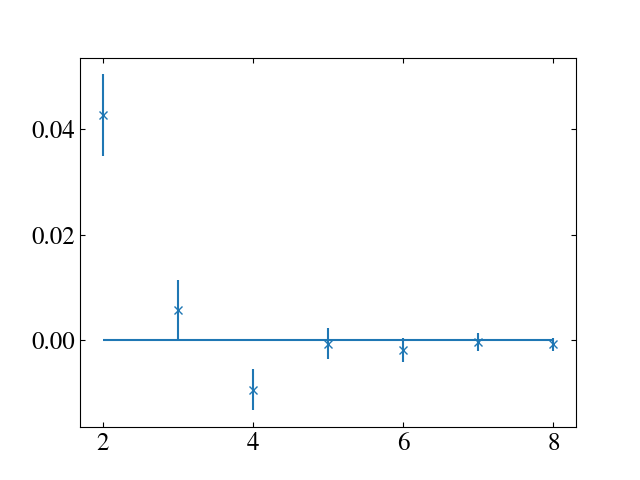

In [40]:
plt.close('all')

path_to_dataT = "/home/daniel/Master_thesis/Data/runs_ED"

cl_runs = cr.collected_runs(path_to_dataT, False, cutoff=1)

tab = cl_runs.get_x_vs_y_data("g_param","energy")[6]

N = cl_runs.runs[0].params["N"]

E_ED = -2.54815333583593144340e+01

x = -np.log2(tab[:,0])

plt.figure()
plt.errorbar(x[:-2],tab[:,1][:-2]-E_ED, tab[:,2][:-2],ls = "",marker = "x")

plt.hlines(0,2,8)
plt.show()

# $\eta$: $m^2$ vs $U_2$: $m^2L^{\eta}=f_{\eta}(U_2)$

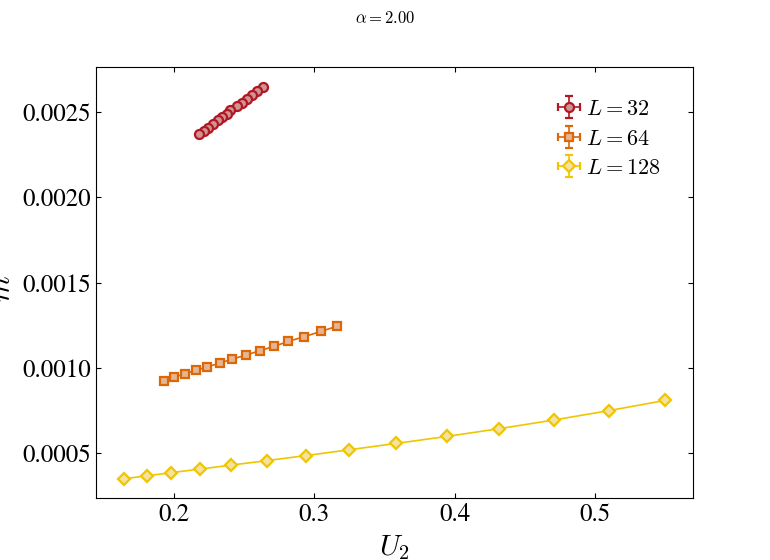

In [91]:
plt.close('all')

path = ["/home/daniel/Master_thesis/Data/Leo4DataJ/runs_Js000"]

cl_runs = cr.collected_runs(path, True, cutoff=100)

data,_,_ = cl_runs.get_x_vs_y_data(
    xname="binder",
    yname="mag2",
    xfunc="x",
    yfunc="y/(Ns**2)",
    plot=True,
    xscale="linear",
    yscale="linear",
    xlabel="",
    ylabel="",
)

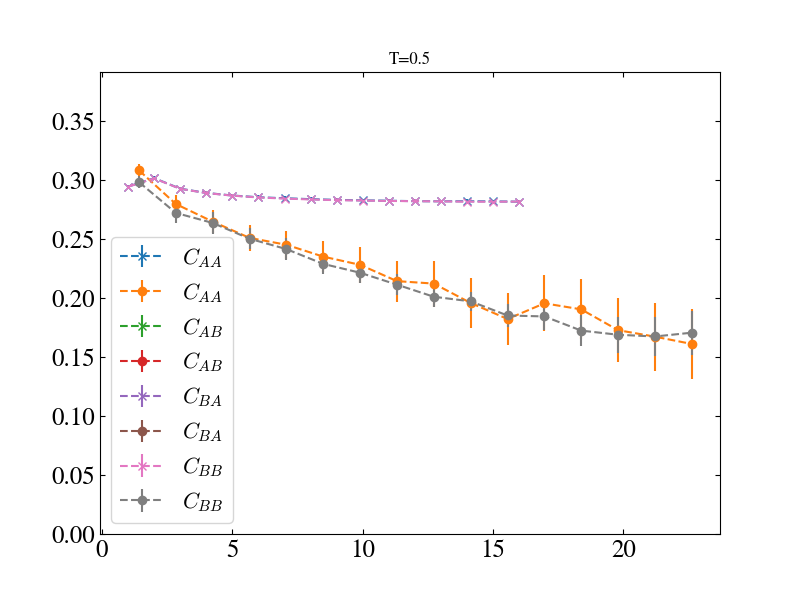

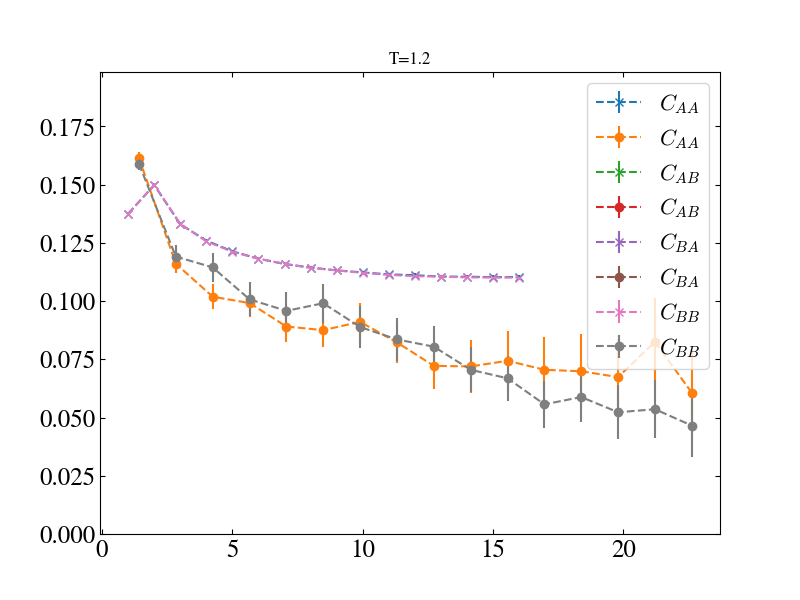

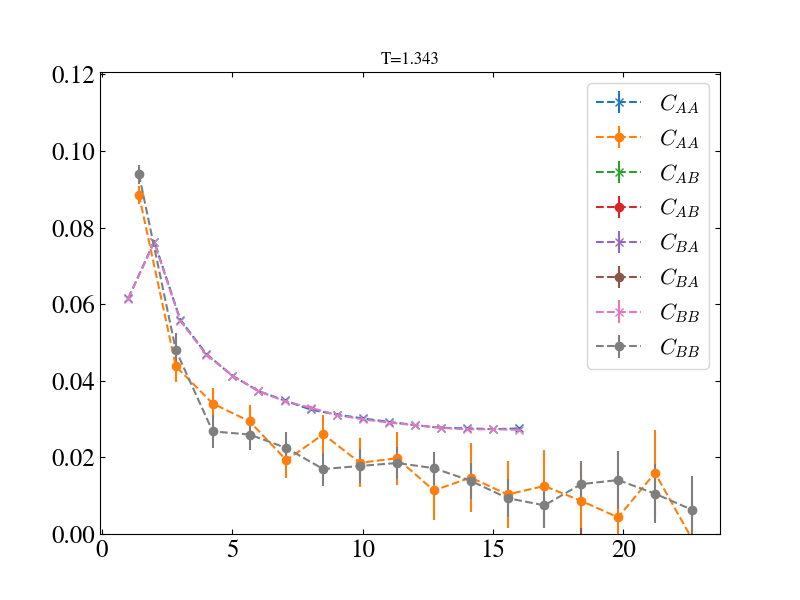

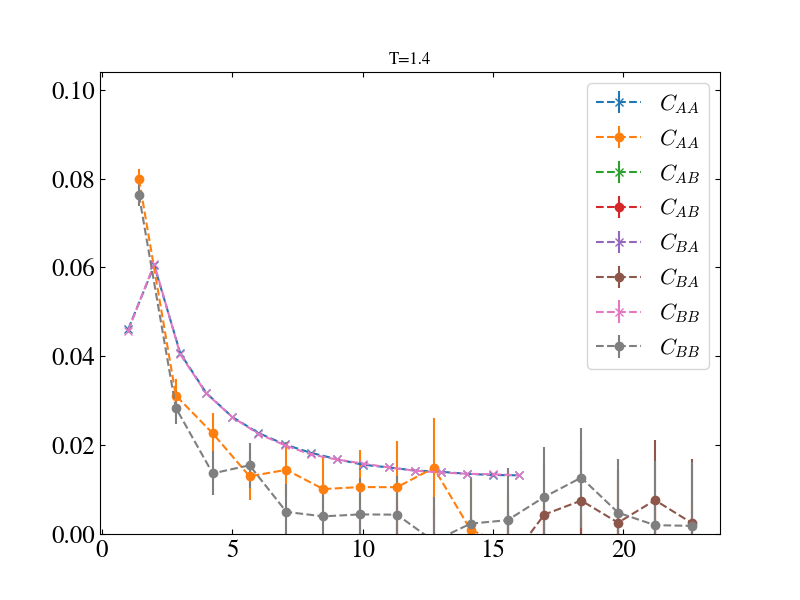

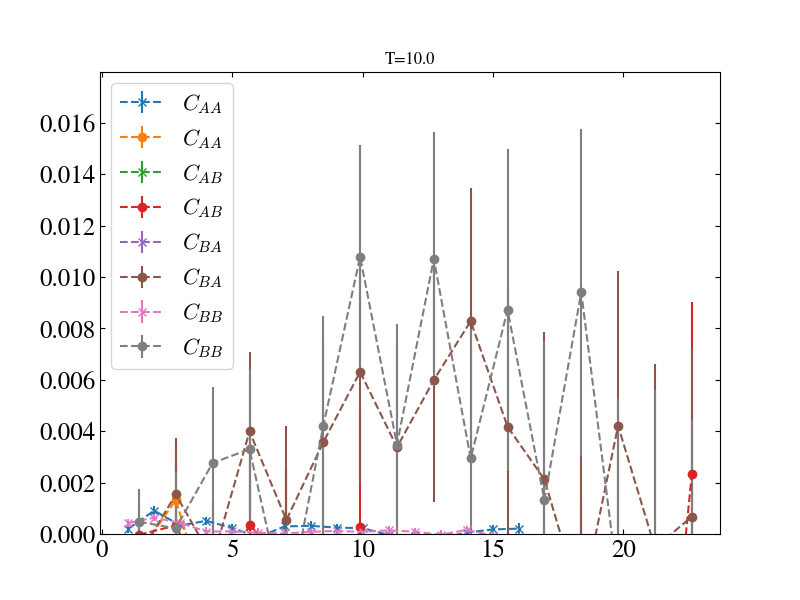

In [17]:
plt.close('all')

path_to_dataT = "/home/daniel/Master_thesis/Data/SPIN_CORR/runs2_Ts000"
# path_to_dataT = "/home/daniel/Master_thesis/SSE_ED/test_run/"

cl_runs = cr.collected_runs(path_to_dataT, False, cutoff=1)
# for run in cl_runs.runs:
#     time = run.time
#     fig = plt.figure()
#     plt.title(f"L={run.params['Lx']}, T={run.g_param}")
#     for key in time.keys():
#         plt.plot(time[key], label=f"{key}")

#     plt.legend()
#     plt.show()

r0 = 1


for run in cl_runs.L_dict[32]:
    spin_corrX = run.get_spin_correletion("X")
    spin_corrDIAG = run.get_spin_correletion("DIAG")
    plt.figure(figsize=(8, 6))
    plt.title(f"T={run.g_param}")
    for lattice_type in ["AA", "AB", "BA", "BB"]:
        x = spin_corrX["distance"]
        y, err = spin_corrX[lattice_type]

        plt.errorbar(
            x[r0:],
            (y[r0:]),
            yerr=err[r0:],
            ls="--",
            marker="x",
            label=f"$C_{{{lattice_type}}}$",
        )

        x = spin_corrDIAG["distance"]
        y, err = spin_corrDIAG[lattice_type]

        plt.errorbar(
            x[r0:] * np.sqrt(2),
            (y[r0:]),
            yerr=err[r0:],
            ls="--",
            marker="o",
            label=f"$C_{{{lattice_type}}}$",
        )
    plt.legend()
    plt.xscale("linear")
    plt.yscale("linear")
    plt.ylim(0,)

In [4]:
nupZhao23 = np.array([# alpha, mean, err
[2.30, 1.02932108, 0.03546215],
[2.50, 1.02949726, 0.03533631],
[2.70, 1.00060404, 0.03493362],
[2.90, 0.99131693, 0.03495879],
[3.00, 1.00113257, 0.03168691],
[3.05, 1.01031901, 0.03488328],
[3.10, 1.02081419, 0.03128421],
[3.15, 1.03100736, 0.03115837],
[3.20, 1.03445542, 0.03113320],
[3.30, 1.09020323, 0.03855786],
[3.40, 1.11079091, 0.07364248],
[3.50, 1.27936828, 0.07973322],
[3.60, 1.49898698, 0.11839174],
[3.70, 1.63819292, 0.12581640]])

betaZhao23 = np.array([# alpha, mean, err
[2.30, 0.52924515, 0.03442599],
[2.50, 0.53276764, 0.03373602],
[2.70, 0.52270857, 0.03476493],
[2.90, 0.48908149, 0.03500702],
[3.00, 0.50858229, 0.03129085],
[3.05, 0.49458916, 0.03475282],
[3.10, 0.44402750, 0.03113349],
[3.15, 0.43905244, 0.03141190],
[3.20, 0.39971191, 0.03112139],
[3.30, 0.39729095, 0.03809374],
[3.40, 0.31500266, 0.04201569],
[3.50, 0.31367114, 0.04538082],
[3.60, 0.31471215, 0.05574251],
[3.70, 0.31986878, 0.06959037]])

etaZhao23 = np.array([# alpha, mean, err
[2.30, 1.00482525, 0.02614361],
[2.50, 1.00591571, 0.02854261],
[2.70, 1.00635189, 0.01927376],
[2.90, 0.99920942, 0.02554386],
[3.00, 1.01951911, 0.02306308],
[3.05, 0.96927648, 0.02189085],
[3.10, 0.92233248, 0.02276321],
[3.15, 0.88670192, 0.01019574],
[3.20, 0.79055122, 0.02090944],
[3.30, 0.71830871, 0.02041873],
[3.40, 0.61425222, 0.02088218],
[3.50, 0.49795540, 0.01984625],
[3.60, 0.41900660, 0.02000981],
[3.70, 0.38471185, 0.02219072]])

TcZhao23 = np.array([# alpha, mean, err
[2.30, 5.68075223, 0.06713568],
[2.50, 3.57807943, 0.03346261],
[2.70, 2.60208653, 0.02104567],
[2.90, 2.02985478, 0.02104567],
[3.00, 1.82160789, 0.02083521],
[3.05, 1.72427167, 0.02104567],
[3.10, 1.64471904, 0.02104567],
[3.15, 1.55590632, 0.02104567],
[3.20, 1.48677129, 0.00947055],
[3.30, 1.34808033, 0.00947055],
[3.40, 1.23264484, 0.00926009],
[3.50, 1.12815309, 0.00947055],
[3.60, 1.01587445, 0.00926009],
[3.70, 0.93021857, 0.00926009]])


chi2/d.o.f = 11.14         
gc = 5.79719(2)
nu = 0.719(1)
c = 3.1(1)
omega = 0.232(6)
a0 = 0.094(3)
a1 = -0.031(1)
a2 = 0.0067(4)



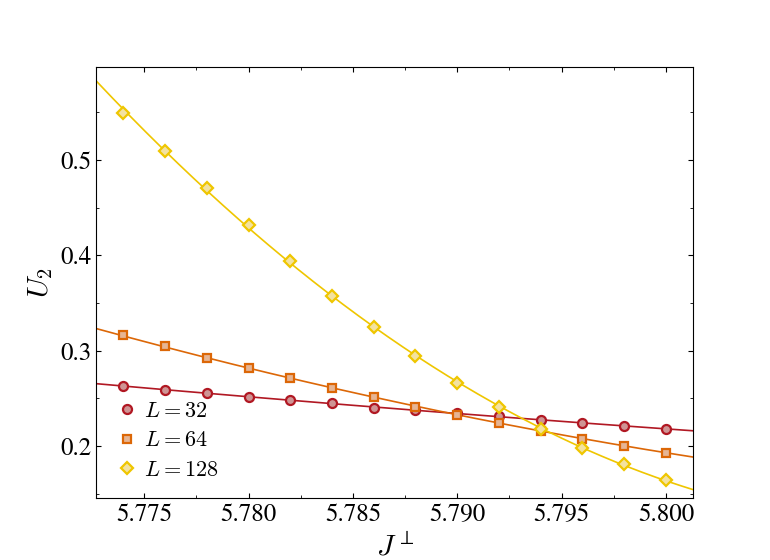

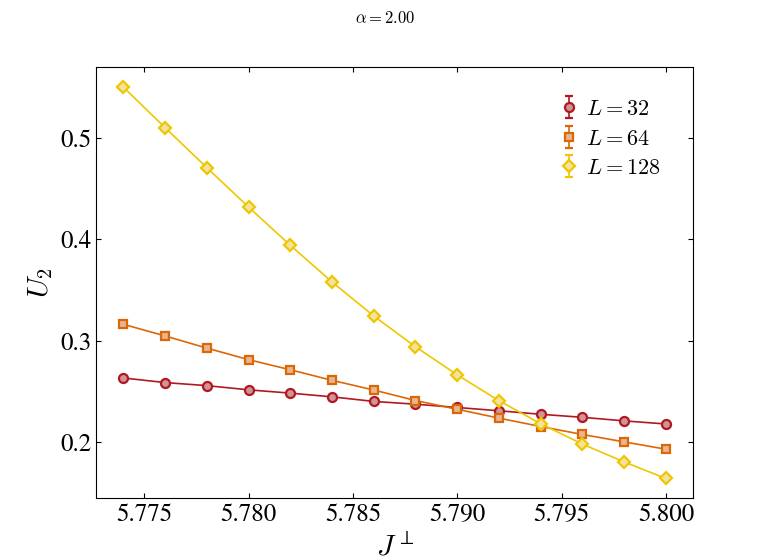

In [34]:
plt.close("all")
#plt.clf()

path = "/home/daniel/Master_thesis/Data/Leo4DataJ/runs_Js000"
#path = "/home/daniel/Master_thesis/Data/runs_BETAJ5"

cl_runs = cr.collected_runs(path, True, cutoff=100)

data, _, _ = cl_runs.get_x_vs_y_data(
    xname="g_param", yname="binder", yfunc="y", xfunc="x", plot=True
)

fitFunc = cr.fitfunc(
    fstring="f((x/gc - 1)*L**(1/nu))*(1 + c*L**(-omega))",
    #fstring="f((x/gc - 1)*L**(1/nu))",
    vars=["gc", "nu", "c", "omega"],
    polyOrder=2,
)

fit_res = cr.data_fit(cr.resample(data), fitFunc, start_params=[5.8, 0.75], fitSummary=True)
params, dparams, redChi2, mesg, ierr = fit_res
fig = cr.fit_plot(data, fitFunc, fit_res, xlabel=r"$J^{\perp}$", ylabel=r"$U_2$")
vars = fitFunc.unpack(params)

# cl_runs.get_x_vs_y_data(
#     xname="g_param",
#     yname="spin_stiffness",
#     yfunc="y*L**(0.1)",
#     xfunc="(x/gc-1)*L**(1/nu)",
#     arg=vars,
#     plot=True,
#     ylabel=f"$L^{-0.25}$",
# )
plt.show()

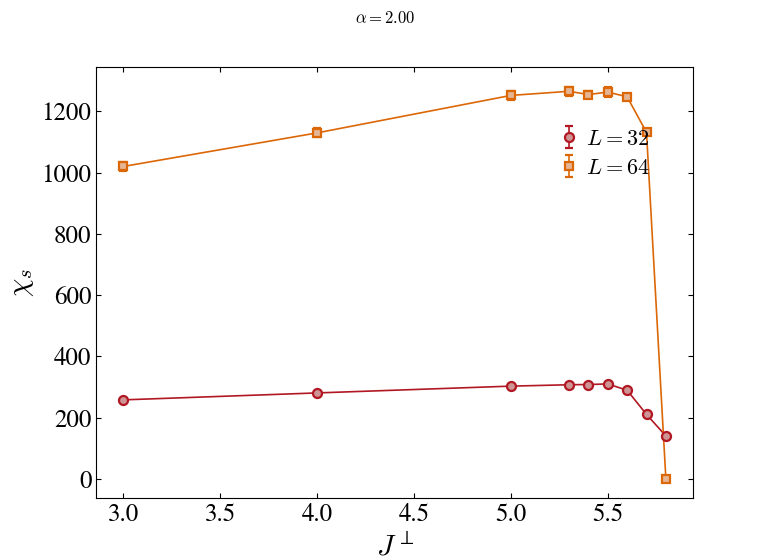

In [39]:

path = f"/home/daniel/Master_thesis/Data/runs_CHI"

cl_runs = cr.collected_runs(path, True, cutoff=10)

data, _, _ = cl_runs.get_x_vs_y_data(
    xname="g_param",
    yname="susceptibility_stag",
    xfunc="x",
    yfunc="y/Ns",
    plot=True,
    xscale="linear",
    yscale="linear",
    xlabel="",
    ylabel="",
)


chi2/d.o.f = 0.24          
z = 0.88(3)
cU = -0.00001(1)
omegaU = -1.7(3)
cS = -1.7(2)
omegaS = 0.35(4)
a0 = 0.23(3)
a1 = 5.7(7)
a2 = 5.7(6)



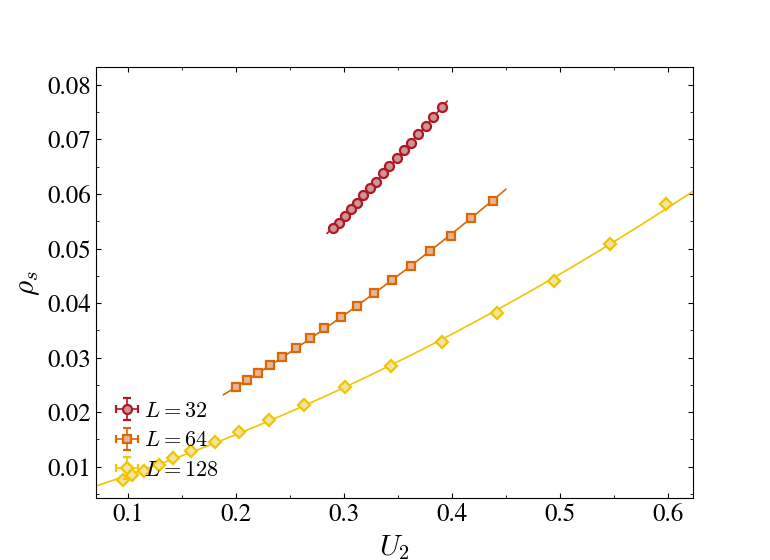

In [77]:
plt.close("all")

path = ["/home/daniel/Master_thesis/Data/Leo4DataJ/runs_Js050"]

cl_runs = cr.collected_runs(path, True, cutoff=100)

# cl_runs.select(LRange=[32, 256], gRange=[1.3, 1.346])

data, _, _ = cl_runs.get_x_vs_y_data(
    xname="binder",
    yname="spin_stiffness"
)

fitFunc = cr.fitfunc(
    fstring="f(x/(1+cU*L**(-omegaU)))*(1+cS*L**(-omegaS))*L**(-z)",
    vars=["z","cU","omegaU","cS","omegaS"],
    polyOrder=2,
)

fit_res = cr.data_fit(data, fitFunc, start_params=[1.0], fitSummary=True)
params, dparams, redChi2, mesg, ierr = fit_res
vars = fitFunc.unpack(params)
fig = cr.fit_plot(data, fitFunc, fit_res, xlabel=r"$U_2$", ylabel=r"$\rho_s$")

In [65]:
plt.close("all")
path = [f"/home/daniel/Master_thesis/Data/Leo4DataJ/runs_Js000"]

cl_runs = cr.collected_runs(path, True, cutoff=100)

cl_runs.select(LRange=[32], gRange=[0.0])

data, _, _ = cl_runs.get_x_vs_y_data(
    xname="g_param",
    yname="spin_stiffness",
    xfunc="x",
    yfunc="y",
    plot=False,
    xscale="linear",
    yscale="linear",
    xlabel="",
    ylabel="",
)

fitFunc = cr.fitfunc(
    fstring="f((x/gc - 1)*L**(1/nu))*(1 + c*L**(-omega))*L**(-z)",
    vars=["gc", "nu", "z", "omega", "c"],
    polyOrder=3,
)

z=[]
zpo=[]

for n in range(1000):
    fit_res = cr.data_fit(
        cr.resample(data), fitFunc, start_params=[5.8, 0.75, 0.23], fitSummary=False
    )
    params, dparams, redChi2, mesg, ierr = fit_res
    var = fitFunc.unpack(params)
    dvar = fitFunc.unpack(dparams)

    z.append(var["z"])
    zpo.append(var["z"] + var["omega"])

    # print(
    #     "chi2 = %.2f, z = %.3f, omega = %.3f, z + omega = %.3f"
    #     % (redChi2, var["z"], var["omega"], var["z"] + var["omega"])
    # )

<lambdifygenerated-481>:2: RuntimeWarning: overflow encountered in scalar power
  return L**(-z)*(1 + L**(-omega)*c)*(L**(3/nu)*a3*(-1 + x/gc)**3 + L**(2/nu)*a2*(-1 + x/gc)**2 + L**(nu**(-1.0))*a1*(-1 + x/gc) + a0)
/home/daniel/Master_thesis/Python_analysis_tools/.venv/lib/python3.12/site-packages/scipy/optimize/_numdiff.py:686: RuntimeWarning: invalid value encountered in subtract
  df = [f_eval - f0 for f_eval in f_evals]
/home/daniel/Master_thesis/Python_analysis_tools/FS3.py:150: RuntimeWarning: overflow encountered in square
  return np.sum(np.array(res)**2)
/home/daniel/Master_thesis/Python_analysis_tools/.venv/lib/python3.12/site-packages/scipy/optimize/_numdiff.py:686: RuntimeWarning: invalid value encountered in subtract
  df = [f_eval - f0 for f_eval in f_evals]
/home/daniel/Master_thesis/Python_analysis_tools/FS3.py:150: RuntimeWarning: overflow encountered in square
  return np.sum(np.array(res)**2)
/home/daniel/Master_thesis/Python_analysis_tools/.venv/lib/python3.12/site-

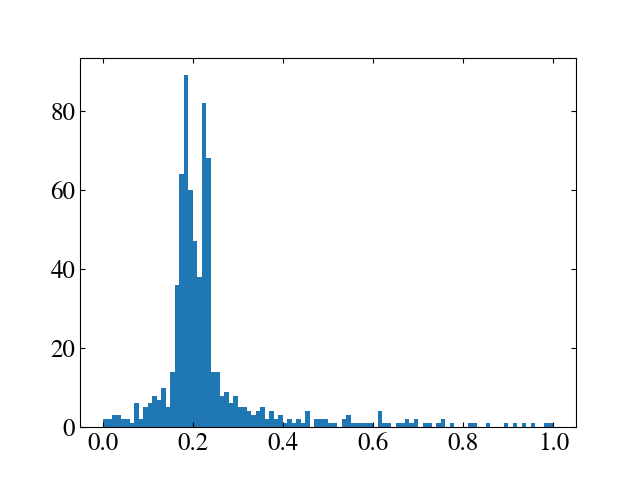

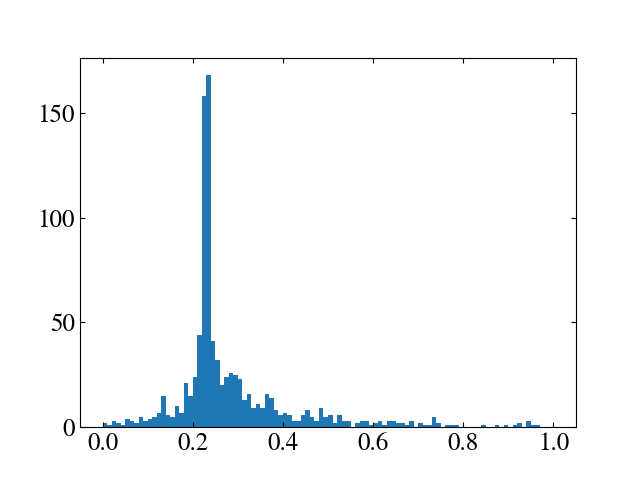

In [68]:
plt.close("all")
fig = plt.figure()
h = plt.hist(z,100,range=(0.0,1.0))
fig = plt.figure()
hz = plt.hist(zpo,100,range=(0.0,1.0))
plt.show()

#plt.scatter(z,zpo)